<a href="https://colab.research.google.com/github/JuanPaBL2/Machine-Learning-Projects/blob/main/Proyecto_1_REGRESION_LOGISTICA_para_BURBUJA_INMOBILIARIA_(Venta_Casas_B%C3%A9lgica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este análisis, busco explorar en profundidad un dataset que contiene principalmente precios de venta de casas en función del tiempo, pertenecientes a Bélgica.

Entendiendo que en el año 2000 (aprox.) existió una burbuja inmobiliaria de precios que generó un mercado bajista de precios que continúa incluso en la actualidad (2023), mi objetivo es entrenar modelos de aprendizaje automático para predecir los comienzos de una burbuja y los inicios de un mercado bajista a fines de constatar si el período en el que me encuentro es propicio para comprar/vender inmuebles y tomar las mejores decisiones.

Luego de crear el dataframe, explorarlo y procesarlo; comienzo a analizar sus variables a través de análisis variado y multivariado. En el análisis variado, específicamente en los gráficos de líneas, puedo visualizar la burbuja de precios y el comienzo del mercado bajista. Dicho período comprende desde 1980 hasta el año 2000, donde se nota un ascenso de precios significativos y continuos, culminando en un doble techo en el 2000 para finalmente romper a la baja y comenzar el mercado bajista.

De esta forma, confirmo que esta crisis mundial del sector inmobiliario también afectó a Bélgica por lo tanto este dataset puede ser de utilidad para intentar construir dichos modelos de aprendizaje automatico.

# CREAR DATAFRAME

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#realizar análisis de componentes principales.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
#aprendizaje supervisado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler

#___________DATAFRAME______________________________

url_csv = ('https://raw.githubusercontent.com/kaiyungtan/Real-Estate-data-analysis/master/data/raw/dataset_house_apartment.csv')

df = pd.read_csv(url_csv)

df.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203,1,None,0,1,None,0,None,95.0,None,2,0,to be done up,1901
1,1880,house,villa,525000,for sale,6.0,250,1,None,0,1,40,1,430,826.0,None,4,0,as new,1992
2,4900,house,exceptional property,550000,for sale,11.0,475,1,None,0,1,None,1,1400,1543.0,None,4,0,good,1853
3,7912,house,villa,550000,for sale,4.0,325,1,None,0,1,125,1,2333,3570.0,None,4,0,good,1918
4,6032,house,house,550000,for sale,5.0,400,1,None,0,1,80,1,500,616.0,None,3,0,as new,1977


# ANALISIS EXPLORATORIO


En esta exploracion de datos, visualizo estadisticas descriptivas, tipo de dato de las variables, observo valores nulos por defecto y valores nulos designados por mi.

**Informacion:** En este apartado observo que muchas variables importantes para graficar y aplicar modelo de regresion contienen tipo de dato OBJET, dato que no es muy eficiente para procesar y manipular.

**Valores nulos:** Observo que .isnull() no arroja el total de nulos, ya que en el descenlace del codigo, especificamente en partes de grafica me encuentro con problemas referidos a datos incorrectos, siendo que estaba correctamente aplicado dropna(). Entiendo que el dataframe contiene valores None como cadena de texto, los interpreto como nulos y por lo tanto decido transformarlos a valor nulo mediante un bucle for para finalmente poder visualizarlos como nulos con isnull().





In [129]:
#estadisticas descriptivas
statics = df.describe()
print("ESTADISTICAS DESCRIPTIVAS")
display(statics)
print("\n")

#tipo de dato de las variables
print("INFORMACION")
info = df.info()
display(info)

#valores nulos del dataframe
ver_nulos20 = df.isnull().sum()
print(f"\nVALORES NULOS\n\n{ver_nulos20}\n")

#reemplaza nones por null, y los muestra con isnull
def verNones(dataframe):
  for columna in dataframe.columns:
      dataframe[columna] = dataframe[columna].replace('None', None)
  return dataframe.isnull().sum()

ESTADISTICAS DESCRIPTIVAS


,locality,number_of_rooms,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,swimming_pool
count,52077.000000,52075.000000,52077.000000,52077.000000,52077.000000,52077.000000,29353.000000,52077.000000
mean,5406.222728,2.814575,0.652284,0.046950,0.563569,0.289859,992.812046,0.015957
std,2958.590968,2.202981,0.476250,0.211533,0.495947,0.453701,5026.021908,0.125311
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2600.000000,2.000000,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000
50%,5060.000000,3.000000,1.000000,0.000000,1.000000,0.000000,350.000000,0.000000
75%,8430.000000,3.000000,1.000000,0.000000,1.000000,1.000000,810.000000,0.000000
max,9992.000000,204.000000,1.000000,1.000000,1.000000,1.000000,400000.000000,1.000000




INFORMACION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52077 entries, 0 to 52076
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     52077 non-null  int64  
 1   type_of_property             52077 non-null  object 
 2   subtype_of_property          52077 non-null  object 
 3   price                        52077 non-null  object 
 4   type_of_sale                 52077 non-null  object 
 5   number_of_rooms              52075 non-null  float64
 6   house_area                   52077 non-null  object 
 7   fully_equipped_kitchen       52077 non-null  int64  
 8   furnished                    52077 non-null  object 
 9   open_fire                    52077 non-null  int64  
 10  terrace                      52077 non-null  int64  
 11  terrace_area                 52077 non-null  object 
 12  garden                       52077 non-null  int64  
 13  ga

None


VALORES NULOS

locality                           0
type_of_property                   0
subtype_of_property                0
price                              0
type_of_sale                       0
number_of_rooms                    2
house_area                         0
fully_equipped_kitchen             0
furnished                          0
open_fire                          0
terrace                            0
terrace_area                       0
garden                             0
garden_area                        0
surface_of_the_land            22724
surface_of_the_plot_of_land        0
number_of_facades                  0
swimming_pool                      0
state_of_the_building              0
construction_year                  0
dtype: int64



# LIMPIEZA Y PROCESAMIENTO


Limpio valores nulos, chequeo que la limpieza se haya efectuado de forma correcta y visualizo el dataframe procesado. Tambien decido suprimir algunas columnas que no voy a utilizar y cambio el tipo de dato de algunas variables a otros con mayor poder de manipulacion y eficiencia.

In [130]:
#limpiar nulos
df1 = df.dropna()

#ver limpieza de nulos
ver_nulos = df1.isnull().sum()
print(f"\nVALORES NULOS\n\n{ver_nulos}\n")

#ver dataframe limpio y procesado
print("DATAFRAME LIMPIO Y PROCESADO\n")
df1.head(5)


VALORES NULOS

locality                       0
type_of_property               0
subtype_of_property            0
price                          0
type_of_sale                   0
number_of_rooms                0
house_area                     0
fully_equipped_kitchen         0
furnished                      0
open_fire                      0
terrace                        0
terrace_area                   0
garden                         0
garden_area                    0
surface_of_the_land            0
surface_of_the_plot_of_land    0
number_of_facades              0
swimming_pool                  0
state_of_the_building          0
construction_year              0
dtype: int64

DATAFRAME LIMPIO Y PROCESADO



,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203,1,None,0,1,None,0,None,95.0,None,2,0,to be done up,1901
1,1880,house,villa,525000,for sale,6.0,250,1,None,0,1,40,1,430,826.0,None,4,0,as new,1992
2,4900,house,exceptional property,550000,for sale,11.0,475,1,None,0,1,None,1,1400,1543.0,None,4,0,good,1853
3,7912,house,villa,550000,for sale,4.0,325,1,None,0,1,125,1,2333,3570.0,None,4,0,good,1918
4,6032,house,house,550000,for sale,5.0,400,1,None,0,1,80,1,500,616.0,None,3,0,as new,1977


In [131]:
#eliminar algunas columnas
columnas = ["state_of_the_building", "subtype_of_property", "type_of_property", "type_of_sale"]

df2 = df1.drop(columnas, axis=1)

df2.head(10)

,locality,price,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,construction_year
0,1050,340000,6.0,203,1,None,0,1,None,0,None,95.0,None,2,0,1901
1,1880,525000,6.0,250,1,None,0,1,40,1,430,826.0,None,4,0,1992
2,4900,550000,11.0,475,1,None,0,1,None,1,1400,1543.0,None,4,0,1853
3,7912,550000,4.0,325,1,None,0,1,125,1,2333,3570.0,None,4,0,1918
4,6032,550000,5.0,400,1,None,0,1,80,1,500,616.0,None,3,0,1977
5,1650,525000,4.0,220,1,None,1,1,None,1,None,1600.0,None,4,0,1990
6,1325,535000,6.0,303,1,None,0,1,30,1,650,810.0,None,4,0,1996
7,4053,385000,6.0,442,0,None,0,0,None,1,2200,2704.0,None,None,0,1952
8,1332,549000,4.0,210,1,None,0,1,None,1,1890,2004.0,None,4,0,1992
9,8310,519000,3.0,273,1,None,1,0,None,1,303,591.0,None,4,0,1996


In [136]:
#aplico funcion que reemplaza nones por null y los muestra con isnull().
print(verNones(df2))

#reemplazo dichos valores none por 0
df3 = df2.fillna(0)

#muestro nuevamente el df
df3.head()

locality                           0
price                              0
number_of_rooms                    0
house_area                      6571
fully_equipped_kitchen             0
furnished                      29352
open_fire                          0
terrace                            0
terrace_area                   22574
garden                             0
garden_area                    22378
surface_of_the_land                0
surface_of_the_plot_of_land    29352
number_of_facades               4251
swimming_pool                      0
construction_year              14318
dtype: int64


,locality,price,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,construction_year
0,1050,340000,6.0,203,1,0,0,1,0,0,0,95.0,0,2,0,1901
1,1880,525000,6.0,250,1,0,0,1,40,1,430,826.0,0,4,0,1992
2,4900,550000,11.0,475,1,0,0,1,0,1,1400,1543.0,0,4,0,1853
3,7912,550000,4.0,325,1,0,0,1,125,1,2333,3570.0,0,4,0,1918
4,6032,550000,5.0,400,1,0,0,1,80,1,500,616.0,0,3,0,1977


In [138]:
#cambio el tipo de dato de algunas columnas para facilitar la grafica
df3["house_area"] = pd.to_numeric(df3["house_area"], errors='coerce')

df3["number_of_facades"] = pd.to_numeric(df3["number_of_facades"], errors='coerce')

df3["price"] = pd.to_numeric(df3["price"], errors='coerce')

df3["construction_year"] = pd.to_datetime(df3["construction_year"])

#chequear cambio de tipo de dato
print("INFORMACION")
info2 = df3.info()
print(info2)

df3.head()

INFORMACION
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29352 entries, 0 to 52076
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   locality                     29352 non-null  int64         
 1   price                        29297 non-null  float64       
 2   number_of_rooms              29352 non-null  float64       
 3   house_area                   29352 non-null  int64         
 4   fully_equipped_kitchen       29352 non-null  int64         
 5   furnished                    29352 non-null  int64         
 6   open_fire                    29352 non-null  int64         
 7   terrace                      29352 non-null  int64         
 8   terrace_area                 29352 non-null  object        
 9   garden                       29352 non-null  int64         
 10  garden_area                  29352 non-null  object        
 11  surface_of_the_land          

,locality,price,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,construction_year
0,1050,340000.0,6.0,203,1,0,0,1,0,0,0,95.0,0,2,0,1901-01-01
1,1880,525000.0,6.0,250,1,0,0,1,40,1,430,826.0,0,4,0,1992-01-01
2,4900,550000.0,11.0,475,1,0,0,1,0,1,1400,1543.0,0,4,0,1853-01-01
3,7912,550000.0,4.0,325,1,0,0,1,125,1,2333,3570.0,0,4,0,1918-01-01
4,6032,550000.0,5.0,400,1,0,0,1,80,1,500,616.0,0,3,0,1977-01-01


# ANALISIS VARIADO Y MULTIVARIADO

ANALISIS UNIVARIADO.

En el analisis univariado, aplico grafico de linea y frecuencia. Primero filtro las variables a utilizar, las ordeno y tomo el promedio de precio por año.

**Grafico de lineas:** En el observo las tendencias de precio con el paso del tiempo, me interesa ver en profundidad la tendencia de precios en el rango de fechas 1980-2020 ya que observo una especie de mercado bajista.




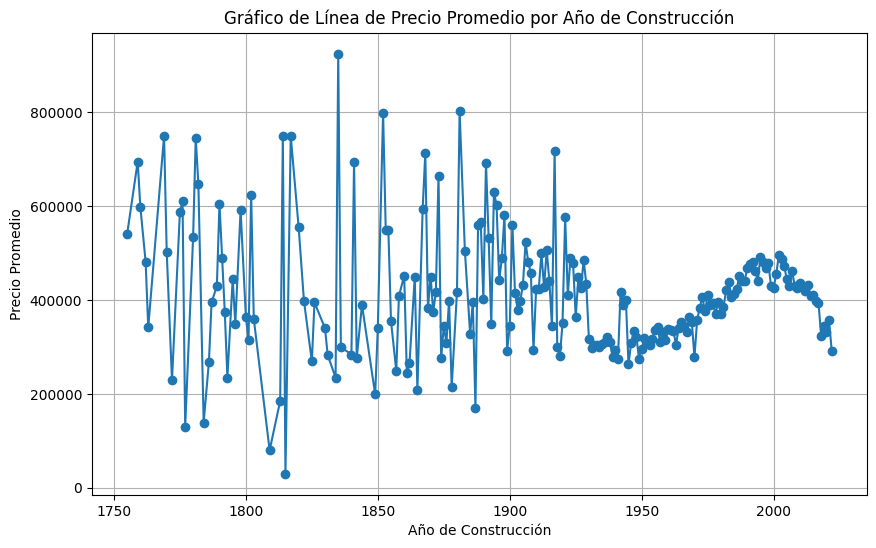

In [139]:
#______ANALISIS  DE LINEAS_______

df4 = df3[["price", "construction_year"]]

df5 = df4.sort_values(by='construction_year', ascending = True)

df_grouped = df5.groupby(df5['construction_year'].dt.year)['price'].mean().reset_index()

# Crea el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['construction_year'], df_grouped['price'], marker='o', linestyle='-')

# Etiquetas de los ejes y título
plt.xlabel('Año de Construcción')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Línea de Precio Promedio por Año de Construcción')

# Muestra el gráfico
plt.grid(True)
plt.show()

**Grafico de lineas en RANGO:** Decido graficar solo el rango de fechas donde interpreto un comienzo de mercado bajista de precios

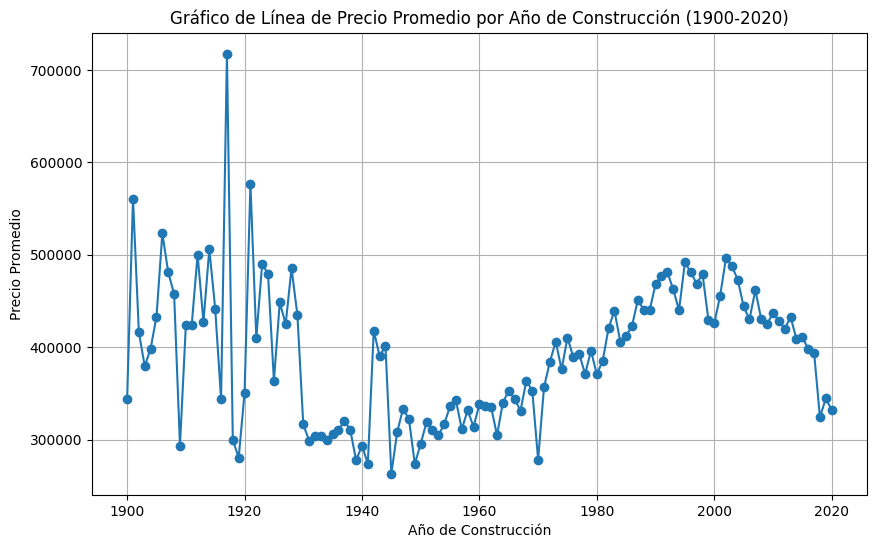

In [142]:
#______ANALISIS  DE LINEAS de un RANGO DE AÑOS_______

#Defino el rango de años
año_inicio = pd.to_datetime('1900-01-01')
año_fin = pd.to_datetime('2020-01-01')

#Creo una máscara para filtrar las filas dentro del rango de años
mask = (df3['construction_year'] >= año_inicio) & (df3['construction_year'] <= año_fin)

#Filtro los datos
df_filtrado = df3[mask]

#Agrupo por año y calculo el precio promedio
df_grouped = df_filtrado.groupby(df_filtrado['construction_year'].dt.year)['price'].mean().reset_index()

#Creo el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['construction_year'], df_grouped['price'], marker='o', linestyle='-')

#Etiquetas de los ejes y título
plt.xlabel('Año de Construcción')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Línea de Precio Promedio por Año de Construcción (1900-2020)')

#Muestro el gráfico
plt.grid(True)
plt.show()


**Grafico de frecuencia:** En este analisis observo las frecuencias de los valores de algunas variables. A pesar de que el resultado de estas visualizaciones no me aporten mucho a mi objetivo principal, decido aplicarlas igual para entender mejor las frecuencias de ciertas variables

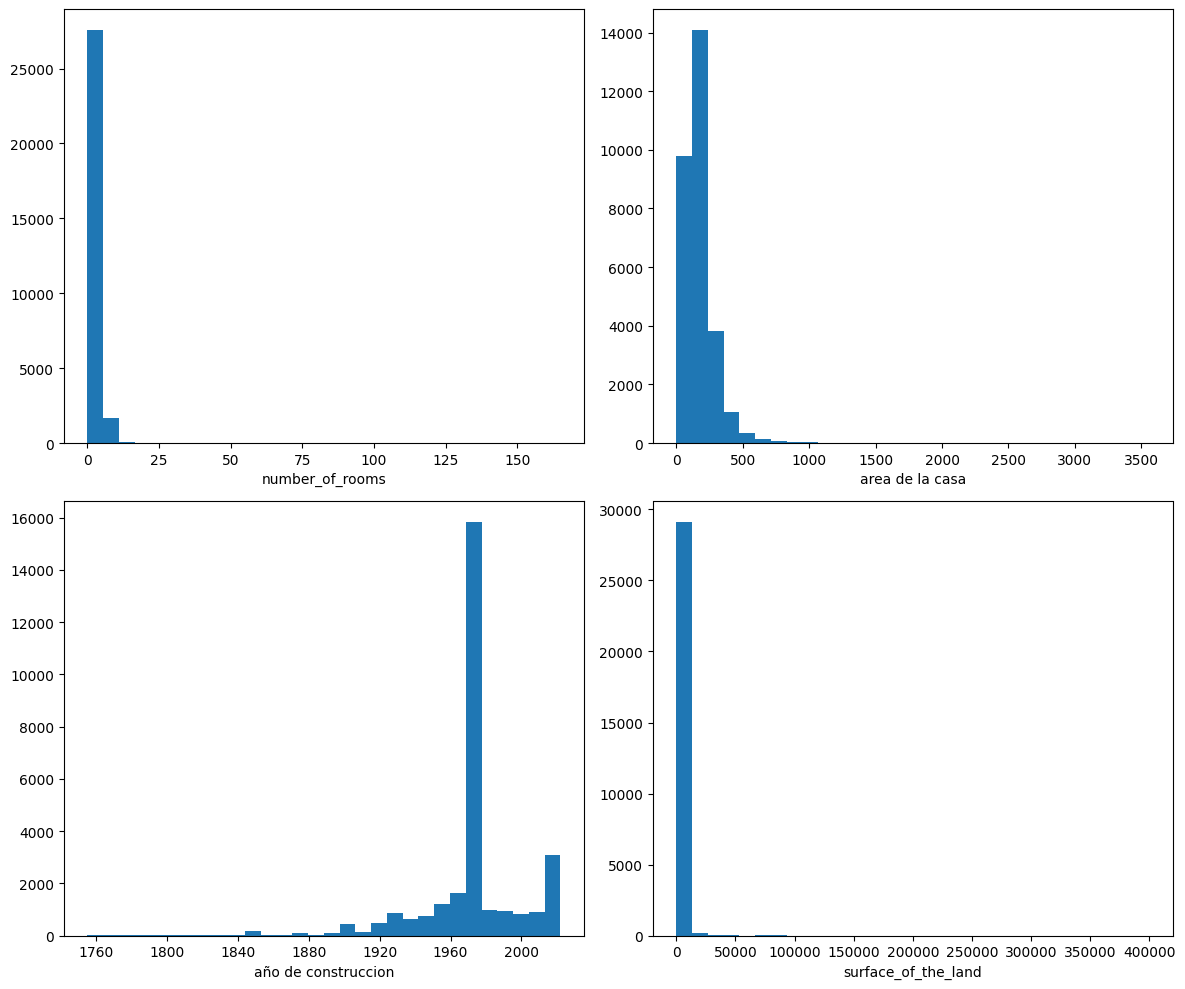

In [143]:
#_____ANALISIS DE FRECUENCIA_____

plt.figure(figsize = (12,10))

plt.subplot(2, 2, 1)
plt.hist(df3["number_of_rooms"], bins=30)
plt.xlabel('number_of_rooms')
plt.title('')

plt.subplot(2, 2, 2)
plt.hist(df3["house_area"], bins=30)
plt.xlabel('area de la casa')
plt.title('')

plt.subplot(2, 2, 3)
plt.hist(df3["construction_year"], bins=30)
plt.xlabel('año de construccion')
plt.title('')

plt.subplot(2, 2, 4)
plt.hist(df3['surface_of_the_land'], bins=30)
plt.xlabel('surface_of_the_land')
plt.title('')

#EJecutar
plt.tight_layout()
plt.show()

ANALISIS MULTIVARIADO

En este tipo de analisis, uso dos tipos de analisis:

Matriz de correlacion: En la matriz puedo observar una fuerte relacion entre la variable localidad y pileta, entiendo que puede ser en zonas de mayor temperatura las casas suelen tener pileta.


<ipython-input-145-d0927cb6d753>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = df3.corr()


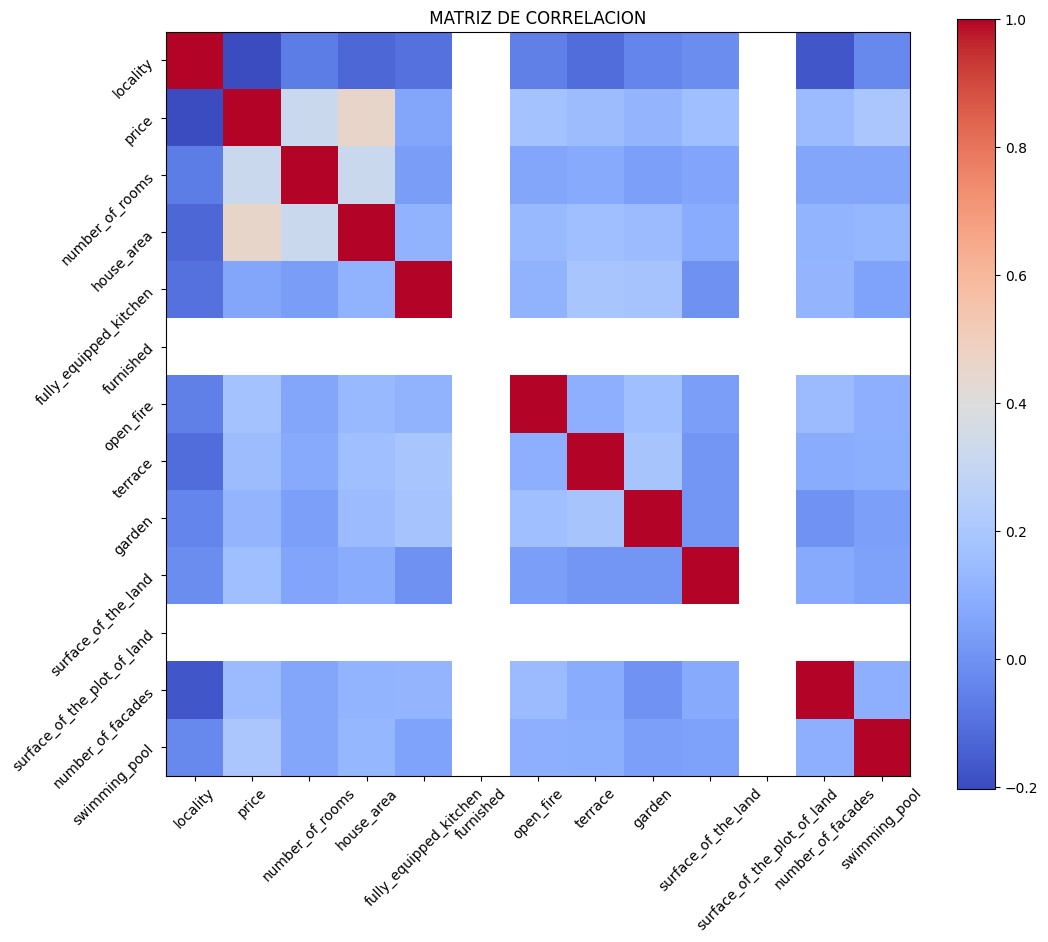

In [145]:
#MATRIZ DE CORRELACION

correlacion_matrix = df3.corr()


plt.figure(figsize=(12,10))
plt.imshow(correlacion_matrix, cmap='coolwarm', interpolation= "nearest")
plt.colorbar()
plt.xticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.yticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.title(' MATRIZ DE CORRELACION ')
plt.show()

print("\n\n")


**Matriz de covarianza:** En esta matriz, observo una fuerte correlacion lineal positiva entre la variable precio y año de construccion, indicando que el paso del tiempo influye fuertemente en el alza de precios.

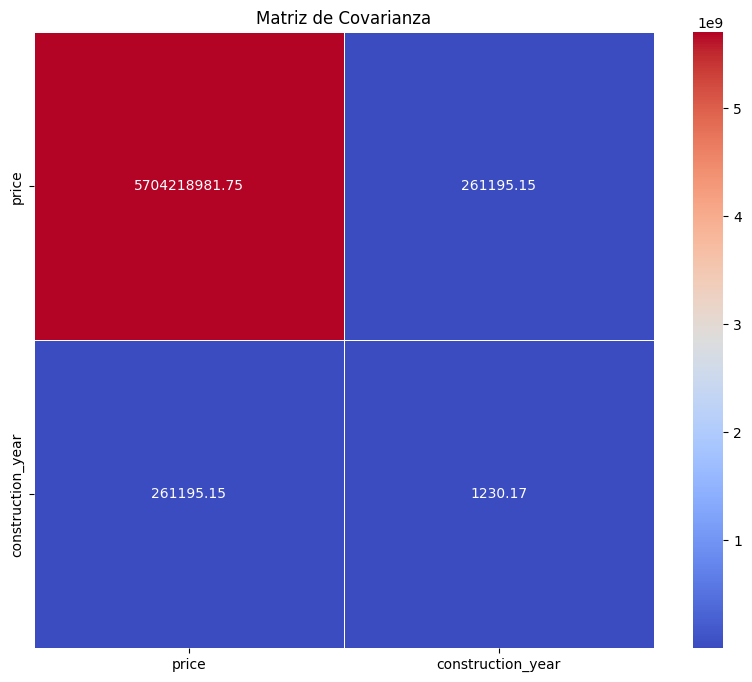

In [148]:
#MATRIZ DE COVARIANZA

columnasMat = ['price', 'construction_year']
cov_matrix = df_grouped[columnasMat].cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Covarianza")
plt.show()



# APRENDIZAJE NO SUPERVISADO: REDIMENSIONAMIENTO


In [149]:
#preparo nuevo df para pca

df_41 = df3.dropna()

df_41.head()

#cambio los datos a float
df41 = df_41[['locality', 'price', 'number_of_rooms', 'house_area', 'garden','garden_area',	'surface_of_the_land',	'swimming_pool']].astype(float)


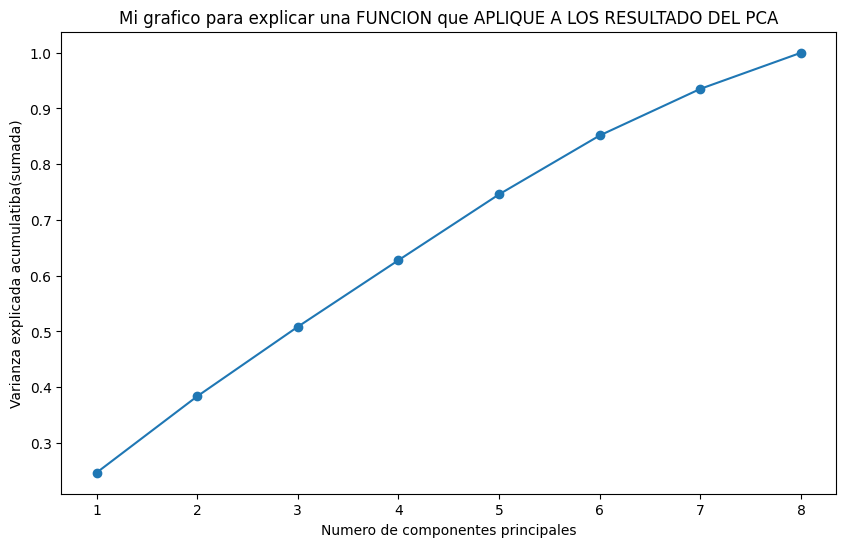

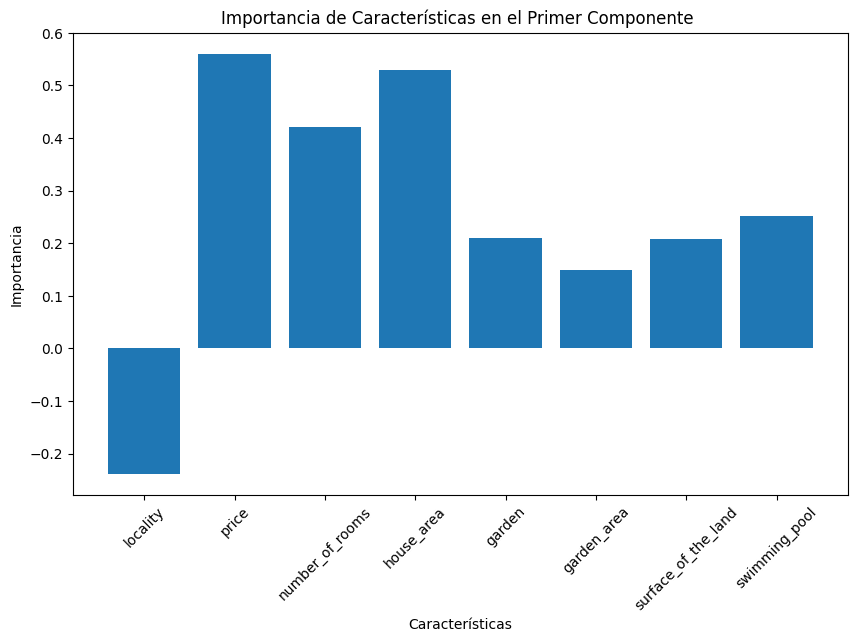

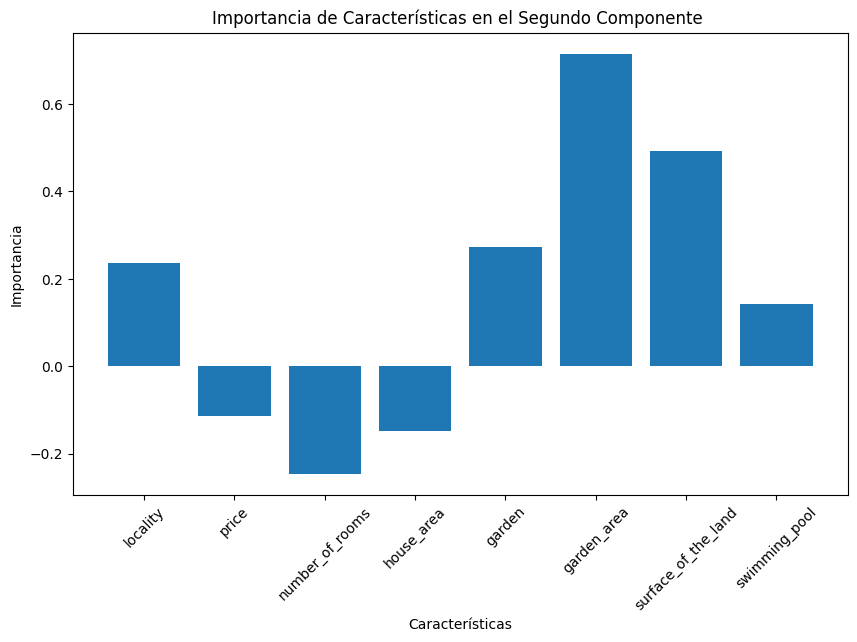




Contribuciones de Características en Cada Componente Principal:


,locality,price,number_of_rooms,house_area,garden,garden_area,surface_of_the_land,swimming_pool
0,-0.237935,0.560577,0.420501,0.528645,0.209291,0.149234,0.208213,0.251849
1,0.235968,-0.114306,-0.245517,-0.148957,0.272764,0.715274,0.492460,0.142312


In [150]:
#_________________________________REDIMENSIONAMIENTO____________________________

#__________ESTANDARIZACION_________________

features_name = ['locality', 'price', 'number_of_rooms', 'house_area', 'garden','garden_area',	'surface_of_the_land',	'swimming_pool']

scaler = StandardScaler()

mercado_scaled = scaler.fit_transform(df41[features_name])

#__________PCA_____________________________

pca= PCA()

pca.fit(mercado_scaled)

#_________________________________METRICAS DE EVALUACION________________________

#__________VARIANZA EXPLICADA_____________________

explicacion_varianza= pca.explained_variance_ratio_
acumulacion_explicacion_varianza= np.cumsum(explicacion_varianza)

#__________VARIANZA EXPLICADA ACOMULATIVA__________

plt.figure(figsize=(10,6))

plt.plot(range(1,len(acumulacion_explicacion_varianza)+1), acumulacion_explicacion_varianza, marker='o')

plt.xlabel('Numero de componentes principales')
plt.ylabel('Varianza explicada acumulatiba(sumada)')

plt.title('Mi grafico para explicar una FUNCION que APLIQUE A LOS RESULTADO DEL PCA')

plt.show()

#N COMPONENTES PRINCIPALES CAPTURAR o RETENER
numeros_de_componentes_a_capturar= 2

#COMPONENTES CAPTURADOS EN NUEVO ESPACIO
pca= PCA(n_components= numeros_de_componentes_a_capturar)
pca_casas = pca.fit_transform(mercado_scaled)

#ANALISIS E INTERPRETACION DE COMPONENTES PRINCIPALES
componentes = pca.components_

#VER IMPORTANCIA DE CARACT. PRINCIPALES
print("\n\n")
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[0])), componentes[0])
plt.xticks(range(len(componentes[0])),features_name, rotation=45,)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Primer Componente ')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[1])), componentes[1])
plt.xticks(range(len(componentes[1])),features_name, rotation=45,)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Segundo Componente ')
plt.show()

print("\n\n")

#LISTA DE CARACTERISTICAS CON CONTRIBUCIONES A CADA COMPONENTE
feature_contributions = pd.DataFrame(componentes,columns=features_name)
print("Contribuciones de Características en Cada Componente Principal:")
feature_contributions.head(10)


# APRENDIZAJE SUPERVISADO: REGRESION LOGISTICA

Comienzo construyendo una variable categorica que indique caro o barato en funcion del promedio de precios

In [151]:
#calculo el precio promedio
promedio_precio = df3['price'].mean()
print(f"PRECIO PROMEDIO: {promedio_precio}\n")

#funcion para crear categoria
def categoria (x, promedio):
  if x > promedio:
    return 1
  else:
    return 0

#creo una nueva columna con la categorica
df3["caro_Barato"] = df3['price'].apply(lambda x: categoria(x, promedio_precio))

#creo nuevo dataframe solo con variables importantes
df_v4 = pd.DataFrame({"price": df3["price"], "construction_year": df3["construction_year"], "CARO_BARATO": df3["caro_Barato"]})

#ordeno los valores
df_v5 = df_v4.sort_values(by='construction_year')

#extraigo solo el año del dataframe
df_v5["construction_year"] = df_v5["construction_year"].dt.year

#lo convierto a float
df_v5["construction_year"] = df_v5["construction_year"].astype(float)

print("DF NUEVA VARIABLE CATEGORICA: 1 (caro), 0 (barato)\n")
df_v5.head(50)

PRECIO PROMEDIO: 322912.6160016384

DF NUEVA VARIABLE CATEGORICA: 1 (caro), 0 (barato)



,price,construction_year,CARO_BARATO
4322,849000.0,1755.0,1
2867,675000.0,1755.0,1
4323,845000.0,1755.0,1
46831,389000.0,1755.0,1
37342,249500.0,1755.0,0
36962,235000.0,1755.0,0
2995,695000.0,1759.0,1
1907,599000.0,1760.0,1
2765,649000.0,1762.0,1
44512,315000.0,1762.0,0


COMIENZO PROCESO DE REGRESION LOGISTICA

Exactitud del modelo: 0.5917220235053654
Precisión: 0.0
Matriz de Confusión:
[[3474    0]
 [2397    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


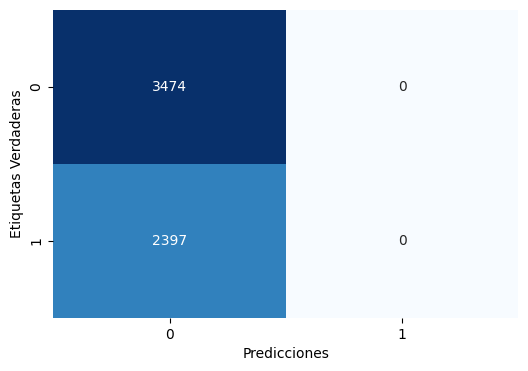

In [152]:
#ESTANDARIZACION

columnas = ['construction_year', 'price']

scaler = StandardScaler()

df_v5[columnas] = scaler.fit_transform(df_v5[columnas])

#DIVIDO DATOS (X,Y)
X = df_v5[["construction_year"]]

y = df_v5["CARO_BARATO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#CREAR MODELO DE REGRESION
modelo = LogisticRegression()

#ENTRENAR MODELO
modelo.fit(X_train, y_train)

#REALIZAR PREDICCIONES
predicciones = modelo.predict(X_test)

#________________________METRICAS DE EVALUACION del MODELO______________________

#________EXACTITUD________________


precision = accuracy_score(y_test, predicciones)
print("Exactitud del modelo:", precision)

#________PRECISION________________

precision = precision_score(y_test, predicciones)
print("Precisión:", precision)

#_______MATRIZ DE CONFUSION_______

confusion_mat = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:")
print(confusion_mat)

#Graficar MATRIZ CONFUSION
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

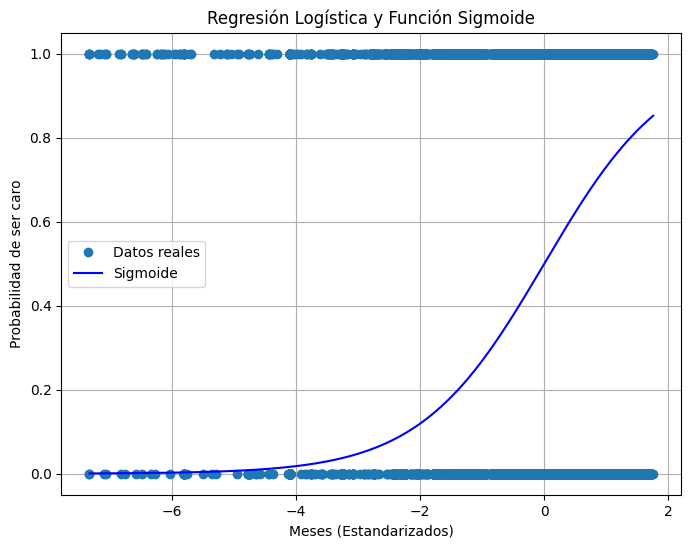

In [153]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_range = np.linspace(X.min(), X.max(), 1000)
y_sigmoid = sigmoid(x_range)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Datos reales')
plt.plot(x_range, y_sigmoid, label='Sigmoide', color='b')
plt.xlabel('Meses (Estandarizados)')
plt.ylabel('Probabilidad de ser caro')
plt.title('Regresión Logística y Función Sigmoide')
plt.grid(True)
plt.legend()